In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import datetime
import random 


%matplotlib inline
import matplotlib.pyplot as plt

# importing sqlite
from sqlalchemy import create_engine
from sqlite3 import connect

In [2]:
# import threading to get data faster by assigning every file request to a thread
import threading 

threads = []
dfs =[]


def get_file(file_url):
        dfs.append(pd.read_csv(file_url))
        print(file_url)
        
# creat a thread for every file to get it faster
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    for week_num in week_nums:
        file_url = url.format(week_num)
        x = threading.Thread(target=get_file, args=(file_url,))
        threads.append(x)
        x.start()
        
    # wait for threads to finish
    for thread in threads:
        thread.join()
    return pd.concat(dfs)
week_nums = [210403,210410,210417,210424,210501,210508,210515,210522,210529,
            210605,210612,210619,210626]
turnstiles_df = get_data(week_nums)
turnstiles_df.to_csv("data.csv",index=False)

http://web.mta.info/developers/data/nyct/turnstile/turnstile_210501.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210529.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210403.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210522.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210619.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210410.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210605.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210515.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210508.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210626.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210424.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210612.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210417.txt


In [3]:
# get sample of the dataframe 
turnstiles_df.sample(8)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
124931,PTH16,R550,01-02-00,LACKAWANNA,1,PTH,05/08/2021,16:10:12,REGULAR,1339,46948
118849,PTH02,R544,00-06-06,HARRISON,1,PTH,04/16/2021,14:44:49,REGULAR,1284,51008
40748,J007,R377,00-06-00,FLUSHING AV,JM,BMT,04/13/2021,09:00:00,REGULAR,368867,269970
73443,N187,R419,00-00-01,ROCKAWAY PARK B,AS,IND,06/17/2021,21:00:00,REGULAR,1256405,1186224
170531,R262,R195,03-03-01,161/YANKEE STAD,4BD,IRT,05/21/2021,00:22:00,REGULAR,3656786,1850837
208560,S102,R165,00-03-00,TOMPKINSVILLE,1,SRT,05/03/2021,14:00:00,REGULAR,642974,22
38873,JFK02,R535,01-00-03,HOWARD BCH JFK,A,IND,06/14/2021,17:00:00,REGULAR,80037,167291
148299,R176,R169,00-00-00,137 ST CITY COL,1,IRT,06/16/2021,17:00:00,REGULAR,11184075,7067156


In [4]:
pwd

'C:\\Users\\nafaa\\Desktop\\WALEEDDAL1-main'

In [5]:
# create sqlite engine
engine = create_engine("sqlite:///mtaproject.db")

In [6]:
# connecting to sqlite database and save Dataframe to three_m2021 table
conn =connect(":memory:")
turnstiles_df.to_sql('three_m2021',conn)
turnstiles_df=pd.read_sql('SELECT * FROM three_m2021',conn)
turnstiles_df

C:\Users\nafaa\anaconda3\lib\site-packages\pandas\core\generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008
...,...,...,...,...,...,...,...,...,...,...,...,...
2720544,209686,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/16/2021,05:00:00,REGULAR,5554,547
2720545,209687,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/16/2021,07:15:02,REGULAR,5554,547
2720546,209688,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/16/2021,13:00:00,REGULAR,5554,547
2720547,209689,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/16/2021,17:00:00,REGULAR,5554,547


In [8]:
#change to timeSerises and make it in one col called [DATE_TIME]
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE+" "+turnstiles_df.TIME,
                                                  format="%m/%d/%Y %H:%M:%S")

In [9]:
turnstiles_df.shape

(2720549, 13)

In [10]:
turnstiles_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,index,ENTRIES,EXITS
count,2720549.0,2720549.0,2720549.0
mean,104636.1,41863093.2,33641903.4
std,60412.2,218544084.5,193281951.0
min,0.0,0.0,0.0
25%,52318.0,216984.0,93452.0
50%,104636.0,1434403.0,861891.0
75%,156954.0,6064212.0,3999029.0
max,209690.0,2147432317.0,2122977065.0


In [11]:
turnstiles_df.columns

Index(['index', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'DATE_TIME'],
      dtype='object')

In [13]:
#remove spaces from columns names.
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['index', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME'],
      dtype='object')

In [57]:
turnstiles_df.sample(10)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
2260892,168645,R254,R181,01-00-00,110 ST,6,IRT,04/22/2021,08:00:00,4519421,2021-04-22 08:00:00
714775,87825,N330C,R202,01-04-00,63 DR-REGO PARK,MR,IND,05/19/2021,16:00:00,262176,2021-05-19 16:00:00
930972,94707,N405,R239,00-04-00,GREENPOINT AV,G,IND,06/15/2021,00:00:00,191,2021-06-15 00:00:00
2031460,148624,R176,R169,00-00-02,137 ST CITY COL,1,IRT,06/20/2021,01:00:00,18103499,2021-06-20 01:00:00
1807776,134115,R113,R028,01-06-03,FULTON ST,2345ACJZ,IRT,05/05/2021,11:00:00,1248681,2021-05-05 11:00:00
2124201,31954,H001,R175,00-05-00,8 AV,ACEL,BMT,04/18/2021,01:00:00,15968,2021-04-18 01:00:00
1480006,15384,B017,R262,00-00-02,BEVERLEY ROAD,BQ,BMT,05/13/2021,12:00:00,5778781,2021-05-13 12:00:00
1164256,118731,PTH02,R544,00-06-05,HARRISON,1,PTH,04/04/2021,02:38:40,24236,2021-04-04 02:38:40
1932904,50068,N037,R314,00-00-00,103 ST,BC,IND,06/20/2021,21:00:00,14997249,2021-06-20 21:00:00
963857,127592,PTH20,R549,03-00-00,NEWARK HM HE,1,PTH,06/17/2021,17:51:53,13067,2021-06-17 17:51:53


In [15]:
# three months data count.
turnstiles_df.DATE.value_counts().sort_index()

03/27/2021    29846
03/28/2021    29822
03/29/2021    29880
03/30/2021    29990
03/31/2021    29842
              ...  
06/21/2021    29869
06/22/2021    29867
06/23/2021    29905
06/24/2021    30074
06/25/2021    29878
Name: DATE, Length: 91, dtype: int64

In [16]:
# columns names interpreting


#C/A	Control Area (A002)
#UNIT	Remote Unit for a station (R051)
#SCP	Subunit Channel Position represents an specific address for a device (02-00-00)
#STATION	Represents the station name the device is located at
#LINENAME	Represents all train lines that can be boarded at this station
#DIVISION	Represents the Line originally the station belonged to BMT, IRT, or IND
#DATE	Represents the date (MM-DD-YY)
#TIME	Represents the time (hh:mm:ss) for a scheduled audit event
#DESC	Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
#ENTRIES	The comulative entry register value for a device
#EXITS	The cumulative exit register value for a device

In [17]:
#Three_Months_subset = Three_Months[['C/A','SCP','UNIT','STATION','LINENAME','DIVISION','ENTRIES', 'EXITS', 'DATE_TIME']]

In [18]:
#Three_Months_subset.head(10)

In [20]:
mask = ((turnstiles_df["C/A"] == "A002") &
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))

turnstiles_df[mask].head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898,2021-04-24 00:00:00
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903,2021-04-24 04:00:00
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918,2021-04-24 08:00:00
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977,2021-04-24 12:00:00
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008,2021-04-24 16:00:00


In [59]:
#Take a look on the duplicate. at 2021-07-3 
#Check how many Entries i have at sepcific hour if its more 1 i have drop duplicated entries
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(7)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-03-27 00:00:00,1
1813655,R138,R293,00-05-00,34 ST-PENN STA,2021-05-01 10:00:00,1
1813657,R138,R293,00-05-00,34 ST-PENN STA,2021-05-01 18:00:00,1
1813658,R138,R293,00-05-00,34 ST-PENN STA,2021-05-01 22:00:00,1
1813659,R138,R293,00-05-00,34 ST-PENN STA,2021-05-02 02:00:00,1
1813660,R138,R293,00-05-00,34 ST-PENN STA,2021-05-02 06:00:00,1
1813661,R138,R293,00-05-00,34 ST-PENN STA,2021-05-02 10:00:00,1


In [22]:

mask = ((turnstiles_df["C/A"] == "S101") & 
(turnstiles_df["UNIT"] == "R070") & 
(turnstiles_df["SCP"] == "00-00-02") & 
(turnstiles_df["STATION"] == "ST. GEORGE") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2021,9,16).date()))
turnstiles_df[mask].head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME


In [61]:
mask = ((turnstiles_df["C/A"] == "A006") &
        (turnstiles_df["UNIT"] == "R079") & 
        (turnstiles_df["SCP"] == "00-03-02") & 
        (turnstiles_df["STATION"] == "5 AV/59 ST"))

turnstiles_df[mask].sample(7)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
1465427,805,A006,R079,00-03-02,5 AV/59 ST,NQRW,BMT,05/11/2021,14:00:00,1128356,2021-05-11 14:00:00
627784,834,A006,R079,00-03-02,5 AV/59 ST,NQRW,BMT,05/21/2021,02:00:00,1131752,2021-05-21 02:00:00
2302152,800,A006,R079,00-03-02,5 AV/59 ST,NQRW,BMT,06/05/2021,14:00:00,1138484,2021-06-05 14:00:00
418763,881,A006,R079,00-03-02,5 AV/59 ST,NQRW,BMT,03/31/2021,14:00:00,1104749,2021-03-31 14:00:00
627783,833,A006,R079,00-03-02,5 AV/59 ST,NQRW,BMT,05/20/2021,22:00:00,1131752,2021-05-20 22:00:00
627757,807,A006,R079,00-03-02,5 AV/59 ST,NQRW,BMT,05/16/2021,14:00:00,1131752,2021-05-16 14:00:00
1046345,820,A006,R079,00-03-02,5 AV/59 ST,NQRW,BMT,04/07/2021,18:00:00,1109114,2021-04-07 18:00:00


In [24]:
# remove duplicated entries
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [64]:
#check for duplicates . at 2016-09-16 
mask = ((turnstiles_df["C/A"] == "R504") & 
(turnstiles_df["UNIT"] == "R276") & 
(turnstiles_df["SCP"] == "00-00-01") & 
(turnstiles_df["STATION"] == "VERNON-JACKSON") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2021, 7, 31).date()))
turnstiles_df[mask].head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME


In [65]:
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-03-27 00:00:00,1
1813655,R138,R293,00-05-00,34 ST-PENN STA,2021-05-01 10:00:00,1
1813657,R138,R293,00-05-00,34 ST-PENN STA,2021-05-01 18:00:00,1
1813658,R138,R293,00-05-00,34 ST-PENN STA,2021-05-01 22:00:00,1
1813659,R138,R293,00-05-00,34 ST-PENN STA,2021-05-02 02:00:00,1


In [27]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored #DON'T EXECUTE IT!
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [28]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [29]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,03/27/2021,7550517
1,A002,R051,02-00-00,59 ST,03/28/2021,7550675
2,A002,R051,02-00-00,59 ST,03/29/2021,7551178
3,A002,R051,02-00-00,59 ST,03/30/2021,7551731
4,A002,R051,02-00-00,59 ST,03/31/2021,7552051


In [31]:
turnstiles_df[(turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE"] == "07/03/2021")]

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME


In [32]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [33]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,03/27/2021,7550517
1,A002,R051,02-00-00,59 ST,03/28/2021,7550675
2,A002,R051,02-00-00,59 ST,03/29/2021,7551178
3,A002,R051,02-00-00,59 ST,03/30/2021,7551731
4,A002,R051,02-00-00,59 ST,03/31/2021,7552051


In [41]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                   .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                   .apply(lambda grp: grp.shift(1)))

<ipython-input-41-97c00eda7609>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily


In [35]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,03/27/2021,7550517,NaN,NaN
1,A002,R051,02-00-00,59 ST,03/28/2021,7550675,03/27/2021,7550517.0
2,A002,R051,02-00-00,59 ST,03/29/2021,7551178,03/28/2021,7550675.0
3,A002,R051,02-00-00,59 ST,03/30/2021,7551731,03/29/2021,7551178.0
4,A002,R051,02-00-00,59 ST,03/31/2021,7552051,03/30/2021,7551731.0


In [42]:
turnstiles_daily.dropna(subset=["PREV_DATE","PREV_ENTRIES"]
                                            ,axis=0,inplace=True)

In [43]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
2,A002,R051,02-00-00,59 ST,03/29/2021,7551178,03/28/2021,7550675.0
3,A002,R051,02-00-00,59 ST,03/30/2021,7551731,03/29/2021,7551178.0
4,A002,R051,02-00-00,59 ST,03/31/2021,7552051,03/30/2021,7551731.0
5,A002,R051,02-00-00,59 ST,04/01/2021,7552051,03/31/2021,7552051.0
6,A002,R051,02-00-00,59 ST,04/02/2021,7552051,04/01/2021,7552051.0


In [38]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
3550,A011,R080,01-03-00,57 ST-7 AV,03/28/2021,885615115,03/27/2021,885615225.0
3551,A011,R080,01-03-00,57 ST-7 AV,03/29/2021,885614981,03/28/2021,885615115.0
3552,A011,R080,01-03-00,57 ST-7 AV,03/30/2021,885614771,03/29/2021,885614981.0
3553,A011,R080,01-03-00,57 ST-7 AV,03/31/2021,885614541,03/30/2021,885614771.0
3554,A011,R080,01-03-00,57 ST-7 AV,04/01/2021,885614329,03/31/2021,885614541.0


In [39]:
# What's the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "A011") & 
(turnstiles_df["UNIT"] == "R080") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "57 ST-7 AV") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2021, 7, 3).date()))
turnstiles_df[mask].head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME


In [45]:
# Let's see how many stations have this problem

(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A011   R080  01-03-00  57 ST-7 AV         89
             01-03-03  57 ST-7 AV          1
             01-03-04  57 ST-7 AV          1
A013   R081  01-06-01  49 ST               1
A015   R081  00-00-02  49 ST               1
                                          ..
R617   R058  00-00-02  BERGEN ST           1
R622   R123  00-00-00  FRANKLIN AV        89
R730   R431  00-00-04  EASTCHSTER/DYRE    88
S101   R070  00-00-04  ST. GEORGE          1
TRAM2  R469  00-05-00  RIT-ROOSEVELT       1
Length: 211, dtype: int64

In [44]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

3082 1390173.0
18 4340953.0
738 18398229.0
14 1028362.0
25 1400020.0
327680 756269765.0
262152 553649999.0
262152 229572623.0
0 5309746.0
101 2651127.0
104 17275602.0
2147432315 8421808.0
262144 33554713.0
24 2627860.0
232 4735529.0
135 8882903.0
113 4454729.0
158 7643335.0
217 4780275.0
1534984195 0.0
4 1534984197.0
67109632 1.0
12517611 82.0
23157312 1627480738.0
687970551 19471253.0
1076 7489966.0
463 6101664.0
162 1110928.0
327 2524852.0
262150 2393328.0
67436550 375578.0
143 4070964.0
5 58304715.0
0 2042881.0
528 2341721.0
2 33030303.0
95 5198958.0
262145 67109778.0
77 2320032.0
393362 104110933.0
175 315605508.0
852524 2830560.0
66470 17650908.0
357 4470823.0
70 30154514.0
1040213826 4086923.0
151200964 50928236.0
196847 3277233.0
87 303654987.0
146668889 1123536132.0
1191142711 12133750.0
536886506 2125787.0
1441950 12919101.0
13943099 8899046.0
62 4183413.0
142 1653213.0
395 11851520.0
91 1925928.0
14455033 262149.0
0 14455033.0


In [46]:
#combine the numbers together. 
#For each ControlArea/UNIT/STATION combo, 
#for each day, sum the counts from each turnstile 
#belonging to that combo


ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,03/29/2021,4244.0
1,A002,R051,59 ST,03/30/2021,4808.0
2,A002,R051,59 ST,03/31/2021,4589.0
3,A002,R051,59 ST,04/01/2021,4495.0
4,A002,R051,59 ST,04/02/2021,4114.0


In [47]:
#daily time series for each STATION, by adding up all the turnstiles in a station.

station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()



,STATION,DATE,DAILY_ENTRIES
0,1 AV,03/29/2021,633578.0
1,1 AV,03/30/2021,6603.0
2,1 AV,03/31/2021,6544.0
3,1 AV,04/01/2021,6365.0
4,1 AV,04/02/2021,6353.0


In [48]:
#Over multiple weeks, sum total ridership for each 
#station and sort them, so you can find out the stations 
#with the highest traffic during the time you investigate


station_totals = station_daily.groupby('STATION').sum().sort_values('DAILY_ENTRIES', ascending=False).reset_index()

station_totals.head()

,STATION,DAILY_ENTRIES
0,86 ST,3805089.0
1,34 ST-PENN STA,3544420.0
2,34 ST-HERALD SQ,3493527.0
3,PATH NEW WTC,3203734.0
4,23 ST,2962185.0


In [49]:
#matplotlib graphs
#Select one turnstile (combination of [C/A, UNIT, SCP, STATION])
#Filter your pandas DataFrame so it 
#only represents a single turnstile 
#(make sure that turnstile has entries for multiple days).
#Using matplotlib, 
#create a plot with the days on the X axis and the daily entries for that turnstile on the Y axis

single_turnstile = turnstiles_daily[(turnstiles_daily["C/A"] == "A011") & 
(turnstiles_daily["UNIT"] == "R080") & 
(turnstiles_daily["SCP"] == "01-00-00") & 
(turnstiles_daily["STATION"] == "57 ST-7 AV")]

single_turnstile.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
3096,A011,R080,01-00-00,57 ST-7 AV,03/29/2021,484102,03/28/2021,484010.0,92.0
3097,A011,R080,01-00-00,57 ST-7 AV,03/30/2021,484225,03/29/2021,484102.0,123.0
3098,A011,R080,01-00-00,57 ST-7 AV,03/31/2021,484343,03/30/2021,484225.0,118.0
3099,A011,R080,01-00-00,57 ST-7 AV,04/01/2021,484464,03/31/2021,484343.0,121.0
3100,A011,R080,01-00-00,57 ST-7 AV,04/02/2021,484574,04/01/2021,484464.0,110.0


Text(0.5, 1.0, 'Daily Entries for Turnstile A011/R080/01-00-00 at 57 ST-7 AV Station')

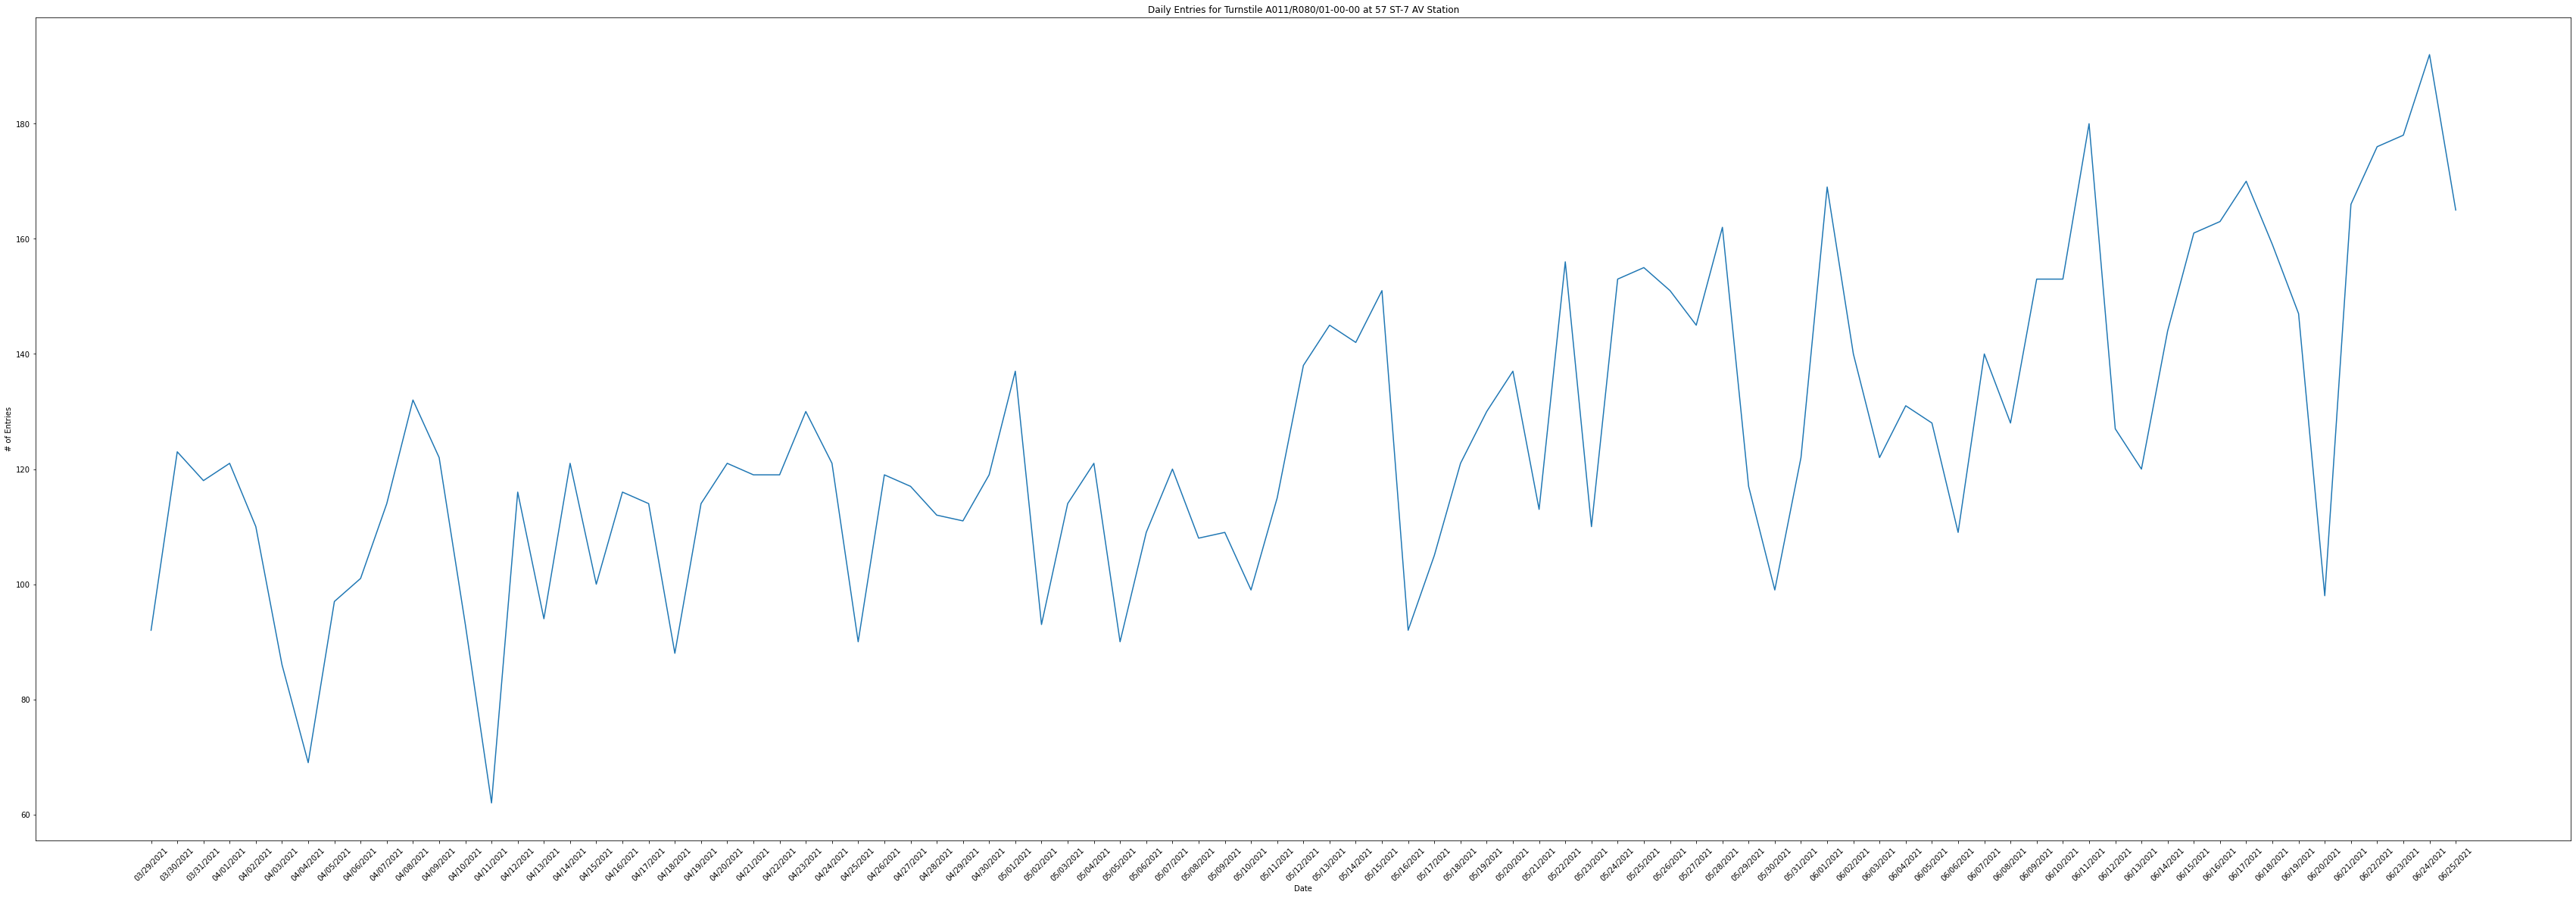

In [50]:
plt.figure(figsize=(60,20))
plt.plot(single_turnstile['DATE'], single_turnstile['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for Turnstile A011/R080/01-00-00 at 57 ST-7 AV Station')


In [51]:
#Plot the daily time series for a station

station_daily_57_av = station_daily[station_daily['STATION'] == '57 ST-7 AV']
station_daily_57_av.head()


,STATION,DATE,DAILY_ENTRIES
7476,57 ST-7 AV,03/29/2021,6333.0
7477,57 ST-7 AV,03/30/2021,7056.0
7478,57 ST-7 AV,03/31/2021,7304.0
7479,57 ST-7 AV,04/01/2021,6957.0
7480,57 ST-7 AV,04/02/2021,6640.0


Text(0.5, 1.0, 'Daily Entries for 57 ST-7 AV Station')

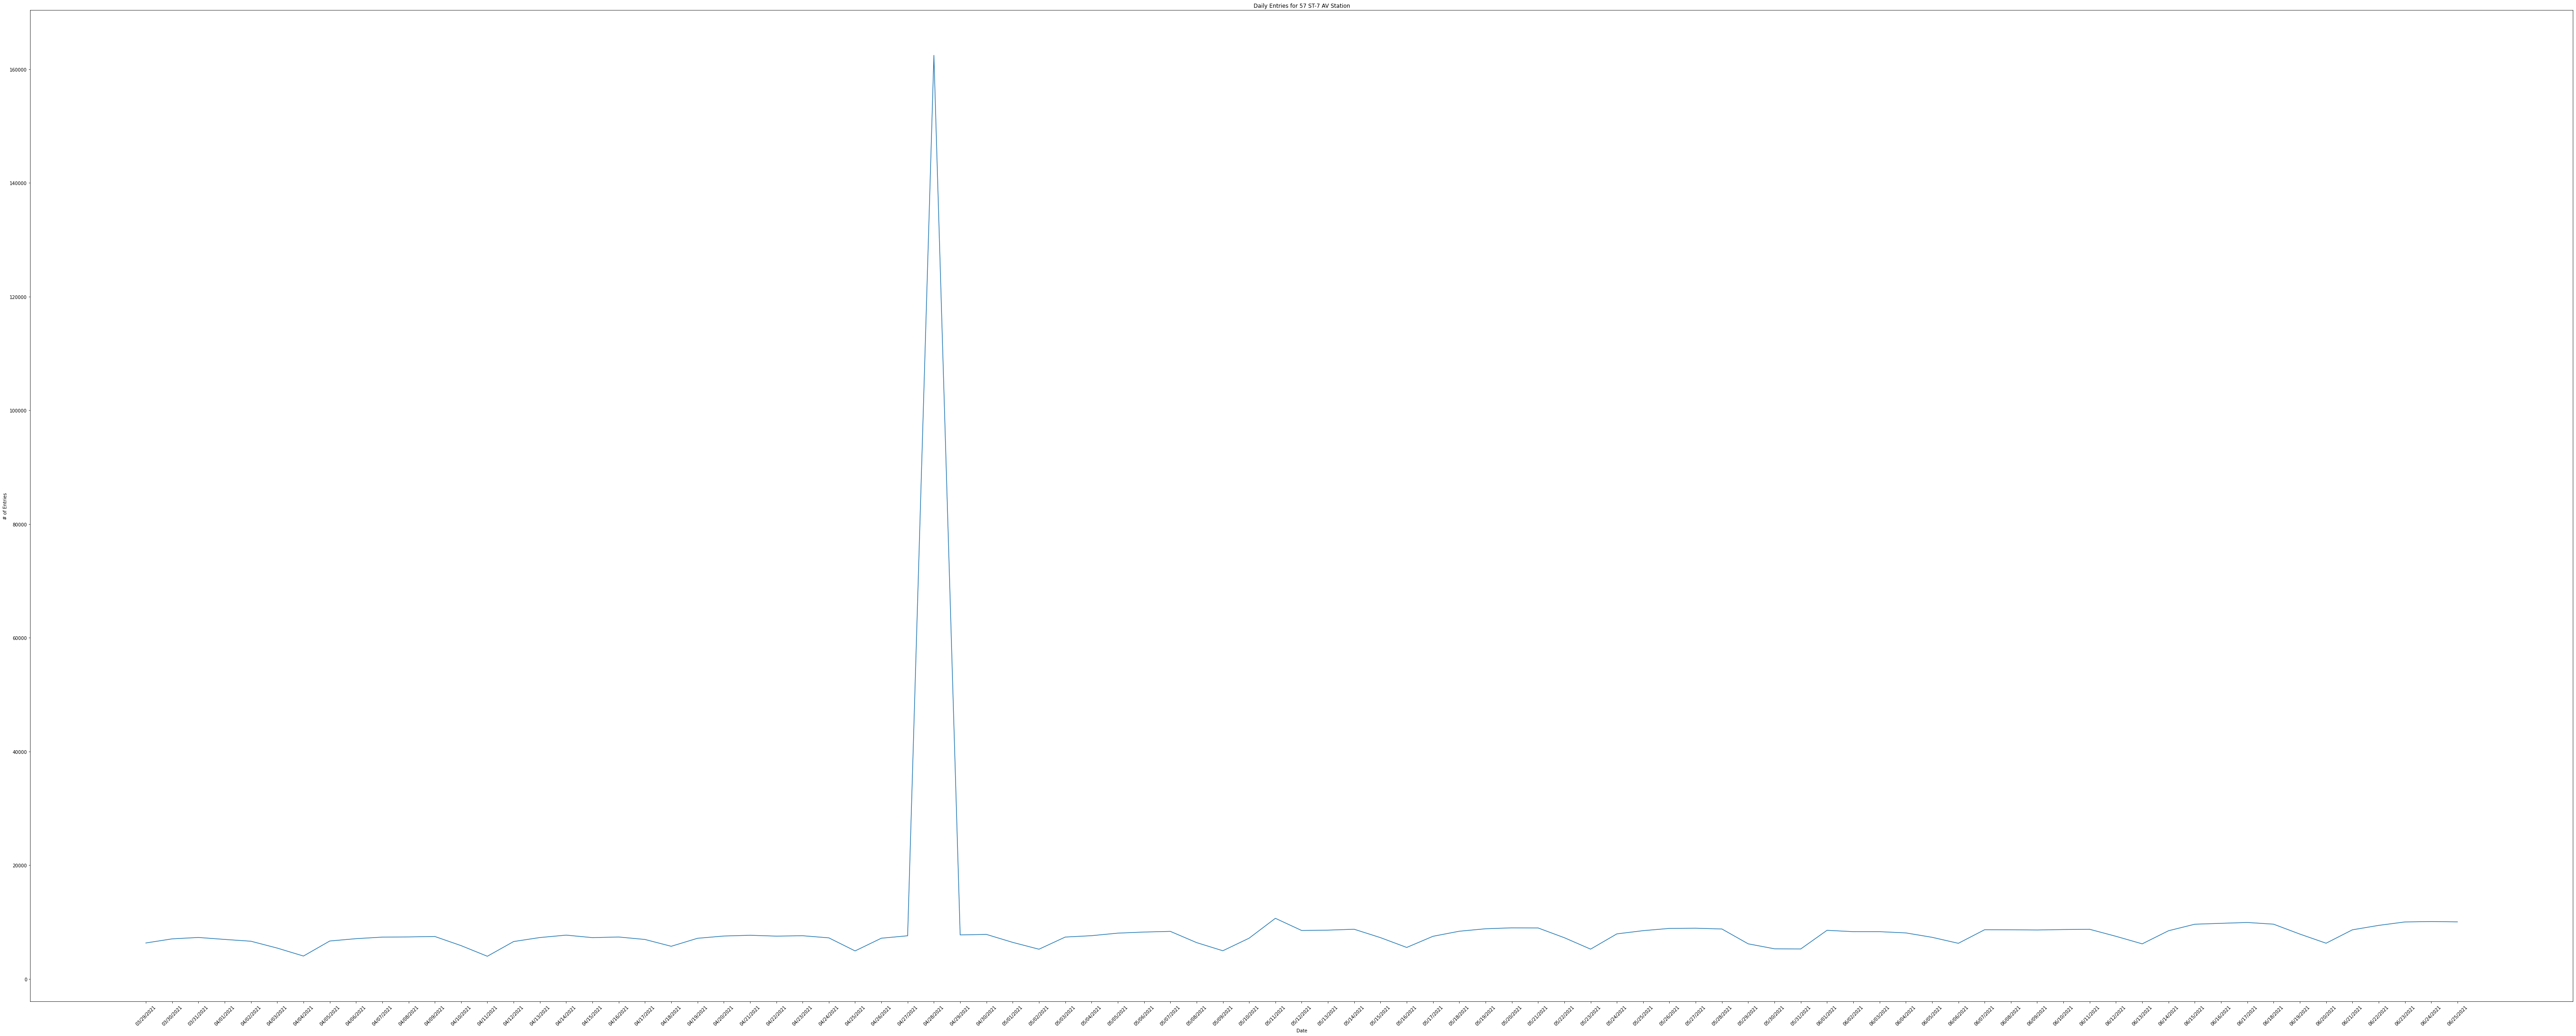

In [52]:
plt.figure(figsize=(100,40))
plt.plot(station_daily_57_av['DATE'], station_daily_57_av['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for 57 ST-7 AV Station')


In [53]:
#Make one list of counts for one week for one station. 
#Monday's count, Tuesday's count, etc. 
#so it's a list of 7 counts.
#Make the same list for another week, and another week, and another week.


station_daily_57_av['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_57_av['DATE']).dt.dayofweek
station_daily_57_av['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_57_av['DATE']).dt.week
station_daily_57_av.head()

<ipython-input-53-b7821b24b6a4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_57_av['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_57_av['DATE']).dt.dayofweek
<ipython-input-53-b7821b24b6a4>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_57_av['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_57_av['DATE']).dt.week
<ipython-input-53-b7821b24b6a4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
7476,57 ST-7 AV,03/29/2021,6333.0,0,13
7477,57 ST-7 AV,03/30/2021,7056.0,1,13
7478,57 ST-7 AV,03/31/2021,7304.0,2,13
7479,57 ST-7 AV,04/01/2021,6957.0,3,13
7480,57 ST-7 AV,04/02/2021,6640.0,4,13


Text(0.5, 1.0, 'Ridership per day for 57 ST-7 AV station')

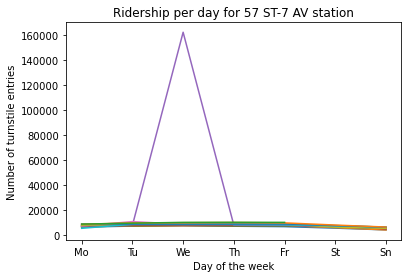

In [54]:

#x_4 =station_daily_57_av.groupby('WEEK_OF_YEAR').head(4)
for i, group in station_daily_57_av.groupby('WEEK_OF_YEAR'): 
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    if i == 29:
        break;
        
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 57 ST-7 AV station')

(array([239.,  69.,  34.,  12.,   8.,   5.,   5.,   3.,   1.,   3.]),
 array([3.5000000e+01, 3.8054040e+05, 7.6104580e+05, 1.1415512e+06,
        1.5220566e+06, 1.9025620e+06, 2.2830674e+06, 2.6635728e+06,
        3.0440782e+06, 3.4245836e+06, 3.8050890e+06]),
 <BarContainer object of 10 artists>)

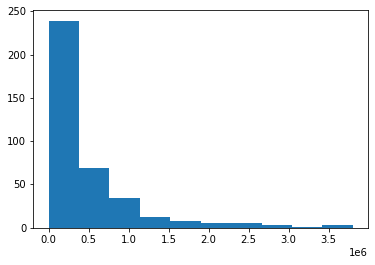

In [55]:
#Make a single list of these total ridership values and plot it
#to get an idea about the distribution of total ridership among different stations.
#This should show you that most stations have a small traffic, and the 
#histogram bins for large traffic volumes have small bars


plt.hist(station_totals['DAILY_ENTRIES'])



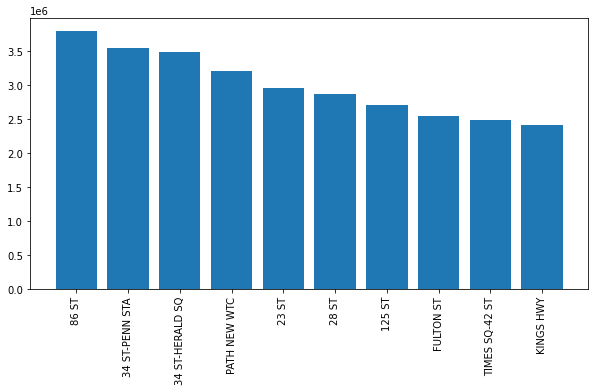

In [56]:
#Viewing top ten stations

plt.figure(figsize=(10,5))
plt.bar(x=station_totals['STATION'][:10], height=station_totals['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90);